<a href="https://colab.research.google.com/github/jslinuxta/Colab/blob/main/LangChain_Onepager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is code for the LangChain Onepager:
- [pdf](https://github.com/IvanReznikov/DataVerse/blob/main/Onepagers/pdfs/langchain.pdf)
- [code](https://github.com/IvanReznikov/DataVerse/blob/main/Onepagers/code_notebooks/LangChain%20Onepager.ipynb)


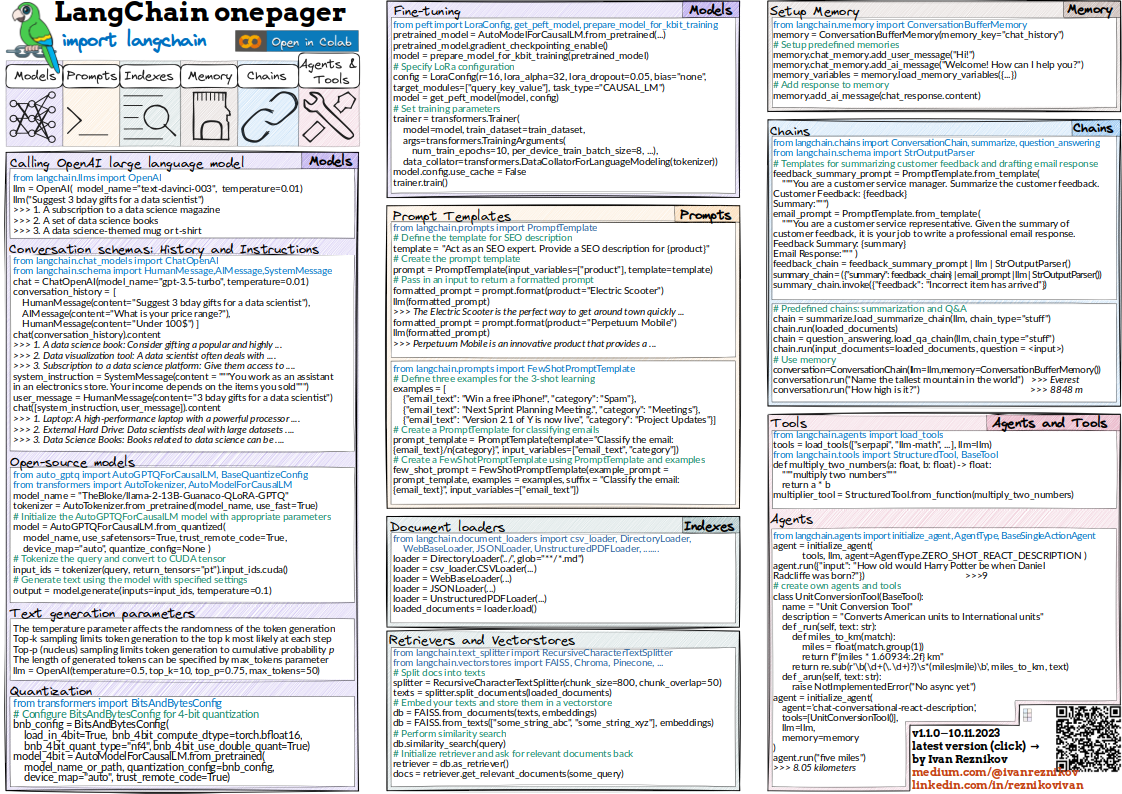

### Install dependencies

In [ ]:
!pip3 install -q langchain==0.0.337 cohere==4.32 openai==0.27.8 tiktoken==0.5.1 faiss-cpu==1.7.4 chromadb==0.3.25
!pip3 install -q jq==1.6.0 google-search-results==2.4.2 python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 66.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.9/962.9 kB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 103.3 

### Setting up env variables

In [ ]:
from dotenv import load_dotenv
import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Public/Cheatsheets/Code

/content/drive/MyDrive/Public/Cheatsheets/Code


In [ ]:
load_dotenv('./.env')

True

## Models

### Calling OpenAI large language model

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-davinci-003", temperature=0.01)

In [ ]:
print(llm("Suggest 3 bday gifts for a data scientist"))



1. A subscription to a data science magazine or journal
2. A set of data science books
3. A data science-themed mug or t-shirt


### Conversation schemas: History and Instructions

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, AIMessage, SystemMessage

chat = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.01)
conversation_history = [
    HumanMessage(content="Suggest 3 bday gifts for a data scientist"),
    AIMessage(content="What is your price range?"),
    HumanMessage(content="Under 100$"),
]

In [ ]:
print(chat(conversation_history).content)

1. A data science book: Consider gifting a popular and highly recommended book on data science, such as "Python for Data Analysis" by Wes McKinney or "The Elements of Statistical Learning" by Trevor Hastie, Robert Tibshirani, and Jerome Friedman. These books can provide valuable insights and knowledge for a data scientist's professional development.

2. Data visualization tool: A data scientist often deals with large datasets and needs to present their findings effectively. Consider gifting a data visualization tool like Tableau Public or Plotly, which can help them create interactive and visually appealing charts and graphs to communicate their data analysis results.

3. Subscription to a data science platform: Give them access to a data science platform like Kaggle or DataCamp, which offer a wide range of courses, tutorials, and datasets for data scientists to enhance their skills and stay updated with the latest trends in the field. This gift can provide them with valuable learning 

In [ ]:
system_instruction = SystemMessage(
    content="""You work as an assistant in an electronics store.
                                Your income depends on the items you sold"""
)
user_message = HumanMessage(content="3 bday gifts for a data scientist")

In [ ]:
print(chat([system_instruction, user_message]).content)

1. Laptop: A high-performance laptop is essential for any data scientist. Look for a model with a powerful processor, ample RAM, and a large storage capacity. Additionally, consider a laptop with a dedicated graphics card for handling complex data visualization tasks.

2. External Hard Drive: Data scientists deal with large datasets, and having extra storage space is crucial. An external hard drive with a large capacity will allow them to store and backup their data securely. Look for a reliable and fast external hard drive that offers ample storage space.

3. Data Science Books: Books are always a great gift for someone in a specific field. Look for books that cover topics such as machine learning, data analysis, and statistical modeling. Some popular options include "The Elements of Statistical Learning" by Trevor Hastie, Robert Tibshirani, and Jerome Friedman, "Python for Data Analysis" by Wes McKinney, and "Deep Learning" by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.

Reme

### Bonus: Embeddings

In [ ]:
from langchain.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()
text_embedding = embeddings.embed_query("Birthday gifts for data scientists")

In [ ]:
len(text_embedding)

1536

In [ ]:
text_embedding[:5]

[-0.011253310092015174,
 -0.01966237624732436,
 0.005149179517382657,
 -0.04811854889559678,
 0.00022070365046345203]

For code regarding running open-source models, quantization and finetuning:
https://github.com/IvanReznikov/DataVerse/tree/main/Courses/LangChain/Lecture2.%20Models

## Prompts

In [ ]:
from langchain.prompts import PromptTemplate

# Define the template for SEO description
template = "Act as an SEO expert. Provide a SEO description for {product}"
# Create the prompt template
prompt = PromptTemplate(input_variables=["product"], template=template)
# Pass in an input to return a formatted prompt
formatted_prompt = prompt.format(product="Electric Scooter")

In [ ]:
print(llm(formatted_prompt))



An electric scooter is a great way to get around town quickly and efficiently. It is an eco-friendly, cost-effective, and convenient mode of transportation. With its lightweight design and powerful motor, an electric scooter can help you get to your destination quickly and easily. It is also a great way to reduce your carbon footprint and save money on fuel costs. To ensure that your electric scooter is optimized for search engine results, it is important to use relevant keywords in your content. This includes words such as “electric scooter”, “eco-friendly”, “cost-effective”, “convenient”, “lightweight”, “powerful motor”, “carbon footprint”, and “fuel costs”. Additionally, it is important to include links to other relevant websites and content to help boost your SEO rankings. By optimizing your electric scooter content for search engine results, you can ensure that your product is seen by potential customers.


In [ ]:
formatted_prompt = prompt.format(product="Perpetuum Mobile")

In [ ]:
print(llm(formatted_prompt))



Perpetuum Mobile is a leading provider of innovative, sustainable energy solutions. Our products and services are designed to help businesses and individuals reduce their carbon footprint and save money on energy costs. We specialize in solar, wind, and geothermal energy systems, as well as energy storage solutions. Our team of experienced engineers and technicians are dedicated to providing the highest quality products and services to our customers. We strive to be the most reliable and cost-effective provider of renewable energy solutions in the industry. With our commitment to sustainability and customer satisfaction, Perpetuum Mobile is the perfect choice for your energy needs.


In [ ]:
from langchain.prompts import FewShotPromptTemplate

# Define three examples for the 3-shot learning
examples = [
    {"email_text": "Win a free iPhone!", "category": "Spam"},
    {"email_text": "Next Sprint Planning Meeting.", "category": "Meetings"},
    {"email_text": "Version 2.1 of Y is now live", "category": "Project Updates"},
]
# Create a PromptTemplate for classifying emails
prompt_template = PromptTemplate(
    input_variables=["email_text", "category"],
    template="Classify the email: {email_text} /n {category}",
)
# Create a FewShotPromptTemplate using PromptTemplate and examples
few_shot_prompt = FewShotPromptTemplate(
    example_prompt=prompt_template,
    examples=examples,
    suffix="Classify the email: {email_text}",
    input_variables=["email_text"],
)

In [ ]:
formatted_prompt = few_shot_prompt.format(
    email_text="Hi. I'm rescheduling daily standup tomorrow to 10am."
)

In [ ]:
print(llm(formatted_prompt))

 /n Meetings


## Indexes

### Document loaders

In [ ]:
from langchain.document_loaders import (
    csv_loader,
    DirectoryLoader,
    WebBaseLoader,
    JSONLoader,
    UnstructuredPDFLoader,
)

#loader = DirectoryLoader("../", glob="**/*.md")
#loader = csv_loader.CSVLoader(...)
#loader = JSONLoader(..., jq_schema="")
#loader = UnstructuredPDFLoader(...)
loader = WebBaseLoader("https://en.wikipedia.org/wiki/History_of_mathematics")
loaded_documents = loader.load()

### Retrievers and Vectorstores

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS, Chroma, Pinecone
# Split docs into texts
text_splitter = RecursiveCharacterTextSplitter(chunk_size=400, chunk_overlap=50)
texts = text_splitter.split_documents(loaded_documents)

In [ ]:
# Embed your texts and store them in a vectorstore
#db = FAISS.from_texts(["some_string_abc", "some_string_xyz"], embeddings)
db = FAISS.from_documents(texts, embeddings)

In [ ]:
# Perform similarity search
db.similarity_search("What is Isaac Newton's contribution in math?")

[Document(page_content="Building on earlier work by many predecessors, Isaac Newton discovered the laws of physics that explain Kepler's Laws, and brought together the concepts now known as calculus. Independently, Gottfried Wilhelm Leibniz, developed calculus and much of the calculus notation still in use today. He also refined the binary number system, which is the foundation of nearly all digital (electronic,", metadata={'source': 'https://en.wikipedia.org/wiki/History_of_mathematics', 'title': 'History of mathematics - Wikipedia', 'language': 'en'}),
 Document(page_content='mathematical developments, interacting with new scientific discoveries, were made at an increasing pace that continues through the present day. This includes the groundbreaking work of both Isaac Newton and Gottfried Wilhelm Leibniz in the development of infinitesimal calculus during the course of the 17th century.', metadata={'source': 'https://en.wikipedia.org/wiki/History_of_mathematics', 'title': 'History of

In [ ]:
# Initialize retriever and ask for relevant documents back
retriever = db.as_retriever()
retriever.get_relevant_documents("What is Isaac Newton's contribution in math?")

[Document(page_content="Building on earlier work by many predecessors, Isaac Newton discovered the laws of physics that explain Kepler's Laws, and brought together the concepts now known as calculus. Independently, Gottfried Wilhelm Leibniz, developed calculus and much of the calculus notation still in use today. He also refined the binary number system, which is the foundation of nearly all digital (electronic,", metadata={'source': 'https://en.wikipedia.org/wiki/History_of_mathematics', 'title': 'History of mathematics - Wikipedia', 'language': 'en'}),
 Document(page_content='mathematical developments, interacting with new scientific discoveries, were made at an increasing pace that continues through the present day. This includes the groundbreaking work of both Isaac Newton and Gottfried Wilhelm Leibniz in the development of infinitesimal calculus during the course of the 17th century.', metadata={'source': 'https://en.wikipedia.org/wiki/History_of_mathematics', 'title': 'History of

## Memory

In [ ]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history")
# Setup predefined memories
memory.chat_memory.add_user_message("Hi!")
memory.chat_memory.add_ai_message("Welcome! How can I help you?")

In [ ]:
memory.load_memory_variables({})

{'chat_history': 'Human: Hi!\nAI: Welcome! How can I help you?'}

In [ ]:
# memory.chat_memory.add_user_message(user_input)
# memory.chat_memory.add_ai_message(chat_response.content)

## Chains

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain, summarize, question_answering
from langchain.schema import StrOutputParser

# Template for summarizing customer feedback
feedback_summary_prompt = PromptTemplate.from_template(
    """You are a customer service manager. Given the customer feedback,
        it is your job to summarize the main points.
Customer Feedback: {feedback}
Summary:"""
)

# Template for drafting a business email response
email_response_prompt = PromptTemplate.from_template(
    """You are a customer service representative. Given the summary of customer feedback,
        it is your job to write a professional email response.
Feedback Summary:
{summary}
Email Response:"""
)

feedback_chain = feedback_summary_prompt | llm | StrOutputParser()
email_chain = (
    {"summary": feedback_chain}
    | email_response_prompt
    | llm
    | StrOutputParser()
)

In [ ]:
# Example of invoking the chain with actual customer feedback
email_chain.invoke({"feedback": "Disappointed with the late delivery and poor packaging."})

'\n\nDear [Customer],\n\nThank you for taking the time to provide us with your feedback. We apologize for the late delivery and the quality of the packaging. We take customer satisfaction very seriously and we are sorry that we did not meet your expectations.\n\nWe are currently working on improving our delivery times and the quality of our packaging. We value your feedback and we will use it to make sure that we are providing the best possible service.\n\nIf you have any further questions or concerns, please do not hesitate to contact us.\n\nSincerely,\n[Your Name]'

In [ ]:
# Predefined chains: summarization and Q&A
chain = summarize.load_summarize_chain(llm, chain_type="stuff")

In [ ]:
chain.run(texts[:30])

' The history of mathematics deals with the origin of discoveries in mathematics and the mathematical methods and notation of the past. It began in the 6th century BC with the Pythagoreans, who coined the term "mathematics". Greek mathematics greatly refined the methods and expanded the subject matter of mathematics. Chinese mathematics made early contributions, including a place value system and the first use of negative numbers. The Hindu–Arabic numeral system and the rules for the use of its operations evolved over the course of the first millennium AD in India and were transmitted to the Western world via Islamic mathematics. From ancient times through the Middle Ages, periods of mathematical discovery were often followed by centuries of stagnation. Beginning in Renaissance Italy in the 15th century, new mathematical developments, interacting with new scientific discoveries, were made at an increasing pace that continues through the present day.'

In [ ]:
chain = question_answering.load_qa_chain(llm, chain_type="stuff")

In [ ]:
chain.run(input_documents=texts[:30], question="Name the greatest Arab mathematicians of the past")

' Muḥammad ibn Mūsā al-Khwārizmī'

In [ ]:
# Use memory
memory=ConversationBufferMemory()
conversation = ConversationChain(llm=llm, memory=memory)

In [ ]:
conversation.run("Name the tallest mountain in the world")

' The tallest mountain in the world is Mount Everest, located in the Mahalangur Himal sub-range of the Himalayas in Nepal and Tibet. It stands at a height of 8,848 meters (29,029 ft) above sea level.'

In [ ]:
conversation.run("How high is it?")

' Mount Everest stands at a height of 8,848 meters (29,029 ft) above sea level.'

## Agents and Tools

### Tools

In [ ]:
# custom function as tool
from langchain.tools import StructuredTool
def text_processing(string: str) -> str:
    """Process the text"""
    return string.lower()
text_processing_tool = StructuredTool.from_function(text_processing)

In [ ]:
from langchain.agents import initialize_agent, AgentType

In [ ]:
agent = initialize_agent([text_processing_tool], llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)
agent.run({"input": "Process the text: London is the capital of Great Britain"})



> Entering new AgentExecutor chain...
 I need to use a text processing tool
Action: text_processing
Action Input: London is the capital of Great Britain
Observation: london is the capital of great britain
Thought: I now know the final answer
Final Answer: london is the capital of great britain

> Finished chain.


'london is the capital of great britain'

In [ ]:
from langchain.agents import load_tools
tools = load_tools(["serpapi", "llm-math"], llm=llm)

In [ ]:
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)
agent.run({"input": "How old would Harry Potter be when Daniel Radcliffe was born?"})



> Entering new AgentExecutor chain...
 I need to figure out when Daniel Radcliffe was born and when Harry Potter was born.
Action: Search
Action Input: "Daniel Radcliffe birthdate"
Observation: July 23, 1989
Thought: I need to figure out when Harry Potter was born.
Action: Search
Action Input: "Harry Potter birthdate"
Observation: July 31, 1980
Thought: I now know the difference between the two birthdates.
Action: Calculator
Action Input: 1989 - 1980
Observation: Answer: 9
Thought: I now know the final answer.
Final Answer: Harry Potter would have been 9 years old when Daniel Radcliffe was born.

> Finished chain.


'Harry Potter would have been 9 years old when Daniel Radcliffe was born.'

### Agents

In [ ]:
from langchain.tools import BaseTool
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
import re

class UnitConversionTool(BaseTool):
    name = "Unit Conversion Tool"
    description = "Converts American units to International units"
    def _run(self, text: str):
        # Enhanced regex patterns for identifying units
        miles_pattern = r'\b(\d+(\.\d+)?)\s*(miles|mile)\b'
        def miles_to_km(match):
            miles = float(match.group(1))
            return f"{miles * 1.60934:.2f} km"
        return re.sub(miles_pattern, miles_to_km, text)
    def _arun(self, text: str):
        raise NotImplementedError("No async yet")

# Initialize conversational memory
conversational_memory = ConversationBufferWindowMemory(
    memory_key='chat_history',
    k=3,
    return_messages=True
)

# Initialize agent with custom tools
tools = [UnitConversionTool()]  # You can add other tools if needed
agent = initialize_agent(
    agent='chat-conversational-react-description',
    tools=tools,
    llm=llm,
    max_iterations=3,
    early_stopping_method='generate',
    memory=conversational_memory,
    handle_parsing_errors=True
)

In [ ]:
agent.run("I ran five miles today")

'Five miles is approximately 8 kilometers.'

In [ ]:
agent.run("Sorry, I meant 15")

'15 kilometers is approximately 9.3 miles'